CODE BY DEVASHISH AGARWAL 

In [1]:
import pandas as pd
import numpy as np
import json
import re
from numpy import unicode_
from googletrans import Translator
from tqdm import  tqdm


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
with open("D:\\SEMESTER 6 UPES\\Natural Language Processing (HONS)\\Theory\\NLP_PROJECT\\fake_news.json", encoding="utf8") as f:
  fake_news = json.load(f)
  #json to dataframe
  fake_news = pd.json_normalize(fake_news,'fake_news')
  f.close()

In [4]:
fake_news

,url,short_description,full_title,long_description
0,https://hindi.boomlive.in/fact-check/imran-kha...,बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...,इमरान खान के क्रॉप्ड वीडियो का दावा- भारत में ...,A video is viral with the claim that Pakistan ...
1,https://hindi.boomlive.in/fact-check/hindi-imp...,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...,हिंदी में लिखे साइन बोर्ड पर कालिख पोतने की ये...,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...
2,https://hindi.boomlive.in/fact-check/pm-narend...,सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...,जनसंख्या नियंत्रण क़ानून के दावे के साथ पीएम मो...,प्रधानमंत्री नरेंद्र मोदी की एक़ तस्वीर सोशल मी...
3,https://hindi.boomlive.in/fact-check/rajnath-s...,दावा है कि भाजपा के नेताओं ने माना है कि सरकार...,राजनाथ सिंह का दो साल पुराना वीडियो फिर हुआ वायरल,NaN
4,https://hindi.boomlive.in/fact-check/balakot-s...,मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...,"ए.एन.आई, अन्य मीडिया संस्थानों ने बालाकोट पर क...",न्यूज़ संस्थान एशियन न्यूज़ इंटरनेशनल के साथ साथ...
...,...,...,...,...
1245,https://hindi.boomlive.in/%E0%A4%AD%E0%A4%BE%E...,भारतीय पहलवान कविता देवी और बुल बुल के बीच हुए...,आरएसएस Vs पाकिस्तान: भारतीय महिला पहलवान कविता...,सोशल मीडिया पर एक फ्री स्टाइल महिला पहलवान का ...
1246,https://hindi.boomlive.in/%E0%A4%85%E0%A4%B8%E...,बूम से बात करते हुए एसबीआई अधिकारी ने बताया कि...,असम में एसबीआई एटीएम के नोटों को चूहों ने किया...,एटीएम मशीन के अंदर फटे नोटों की ये तस्वीर व्हा...
1247,https://hindi.boomlive.in/%E0%A4%AA%E0%A5%87%E...,बीजेपी सांसद परेश रावल एक बार फिर अपने फेक न्य...,पेट्रोल की कीमतों पर राहुल गांधी का फ़ेक ट्विट ...,अभिनेता से सांसद बने परेश रावल ट्विटर पर फेक न...
1248,https://hindi.boomlive.in/%E0%A4%95%E0%A4%B0%E...,मार्च से लेकर मई महीने में अचानक से एक्टिव हुई...,कर्नाटका चुनावों के दौरान एक्टिव फ़ेक न्यूज़ वेब...,कर्नाटक चुनाव के दौर में जो ढेरों वेबसाइटस देख...


In [5]:
with open("D:\\SEMESTER 6 UPES\\Natural Language Processing (HONS)\\Theory\\NLP_PROJECT\\valid_news.json", encoding="utf8") as f:
  true_news = json.load(f)
  #json to dataframe
  true_news = pd.json_normalize(true_news,'true_news')
  f.close()

In [6]:
true_news

,name,url,short_desc,full_title,long_description
0,मोहम्मद सिराज ने हाल में पिता को खो दिया था ले...,https://www.bbc.com/hindi/media-55737672,भारत ने ऑस्ट्रेलिया में टेस्ट सिरीज़ में ऐतिहा...,NaN,NaN
1,ब्रिसबेन टेस्ट का वो पल जब पुजारा के पापा डर ग...,https://www.bbc.com/hindi/media-55737709,ब्रिस्बेन टेस्ट में भारत की दीवार कहे जाने वाल...,NaN,NaN
2,पाकिस्तान के टीवी एंकर इक़रारुल हसन ने भारत की...,https://www.bbc.com/hindi/media-55737716,पाकिस्तानी टीवी प्रेजेंटर सैय्यद इक़रारुल हसन ...,NaN,NaN
3,कहां हुई थी पहली गणतंत्र दिवस परेड,https://www.bbc.com/hindi/india-38748043,किसी से पूछा जाए कि दिल्ली में पहली गणतंत्र दि...,26 जनवरी: गणतंत्र दिवस की पहली परेड कहां हुई थी,26 जनवरी: गणतंत्र दिवस की पहली परेड कहां हुई थ...
4,कार्टून: सख़्त ज़रूरत है,https://www.bbc.com/hindi/india-55735666,वेब सिरीज़ तांडव को लेकर जारी विवाद पर आज का क...,कार्टून: सख़्त ज़रूरत है,कार्टून: सख़्त ज़रूरत है\n4 घंटे पहले\nइमेज स्...
...,...,...,...,...,...
888,ब्रह्मोस एक्सटेंडड रेंज सुपरसोनिक क्रूज़ मिसाइ...,https://www.bbc.com/hindi/media-54552314,ये मिसाइल 400 किलोमीटर से ज़्यादा मार कर सकती है.,NaN,NaN
889,भोलू पहलवानों को भारत क्यों नहीं आने दिया था?,https://www.bbc.com/hindi/media-54552290,"आकर्षण का केंद्र वो शक्तिशाली पहलवान होते थे, ...",NaN,NaN
890,बिहार: जातीय समीकरणों और बीजेपी के हिंदुत्व का...,https://www.bbc.com/hindi/india-54544192,"बिहार के जातिगत समीकरणों की बात बहुत होती है, ...",NaN,NaN
891,स्टेन स्वामी: सबसे बुजुर्ग शख़्स जिन पर लगा आत...,https://www.bbc.com/hindi/india-54520759,एनआईए ने 83 साल के फ़ादर स्टेन स्वामी को गिरफ़...,NaN,NaN


In [7]:
# Changing the column name so that it matches the fake news.
true_news = true_news.rename(columns={'short_desc': 'short_description'})

In [8]:
true_news

,name,url,short_description,full_title,long_description
0,मोहम्मद सिराज ने हाल में पिता को खो दिया था ले...,https://www.bbc.com/hindi/media-55737672,भारत ने ऑस्ट्रेलिया में टेस्ट सिरीज़ में ऐतिहा...,NaN,NaN
1,ब्रिसबेन टेस्ट का वो पल जब पुजारा के पापा डर ग...,https://www.bbc.com/hindi/media-55737709,ब्रिस्बेन टेस्ट में भारत की दीवार कहे जाने वाल...,NaN,NaN
2,पाकिस्तान के टीवी एंकर इक़रारुल हसन ने भारत की...,https://www.bbc.com/hindi/media-55737716,पाकिस्तानी टीवी प्रेजेंटर सैय्यद इक़रारुल हसन ...,NaN,NaN
3,कहां हुई थी पहली गणतंत्र दिवस परेड,https://www.bbc.com/hindi/india-38748043,किसी से पूछा जाए कि दिल्ली में पहली गणतंत्र दि...,26 जनवरी: गणतंत्र दिवस की पहली परेड कहां हुई थी,26 जनवरी: गणतंत्र दिवस की पहली परेड कहां हुई थ...
4,कार्टून: सख़्त ज़रूरत है,https://www.bbc.com/hindi/india-55735666,वेब सिरीज़ तांडव को लेकर जारी विवाद पर आज का क...,कार्टून: सख़्त ज़रूरत है,कार्टून: सख़्त ज़रूरत है\n4 घंटे पहले\nइमेज स्...
...,...,...,...,...,...
888,ब्रह्मोस एक्सटेंडड रेंज सुपरसोनिक क्रूज़ मिसाइ...,https://www.bbc.com/hindi/media-54552314,ये मिसाइल 400 किलोमीटर से ज़्यादा मार कर सकती है.,NaN,NaN
889,भोलू पहलवानों को भारत क्यों नहीं आने दिया था?,https://www.bbc.com/hindi/media-54552290,"आकर्षण का केंद्र वो शक्तिशाली पहलवान होते थे, ...",NaN,NaN
890,बिहार: जातीय समीकरणों और बीजेपी के हिंदुत्व का...,https://www.bbc.com/hindi/india-54544192,"बिहार के जातिगत समीकरणों की बात बहुत होती है, ...",NaN,NaN
891,स्टेन स्वामी: सबसे बुजुर्ग शख़्स जिन पर लगा आत...,https://www.bbc.com/hindi/india-54520759,एनआईए ने 83 साल के फ़ादर स्टेन स्वामी को गिरफ़...,NaN,NaN


In [9]:
# Counting the NULL values in the dataframes
fake_news.isnull().sum(axis = 0)

url                  0
short_description    0
full_title           5
long_description     9
dtype: int64

In [10]:
# Counting the NULL values in the dataframes
true_news.isnull().sum(axis = 0)

name                   0
url                  120
short_description    133
full_title           450
long_description     450
dtype: int64

In [11]:
#deleting url,name,title  and long description of news as we dont require it
true_news=true_news.drop(['name','url', 'full_title','long_description',],axis=1)
fake_news=fake_news.drop(['url','full_title','long_description',],axis=1)

In [12]:
true_news

,short_description
0,भारत ने ऑस्ट्रेलिया में टेस्ट सिरीज़ में ऐतिहा...
1,ब्रिस्बेन टेस्ट में भारत की दीवार कहे जाने वाल...
2,पाकिस्तानी टीवी प्रेजेंटर सैय्यद इक़रारुल हसन ...
3,किसी से पूछा जाए कि दिल्ली में पहली गणतंत्र दि...
4,वेब सिरीज़ तांडव को लेकर जारी विवाद पर आज का क...
...,...
888,ये मिसाइल 400 किलोमीटर से ज़्यादा मार कर सकती है.
889,"आकर्षण का केंद्र वो शक्तिशाली पहलवान होते थे, ..."
890,"बिहार के जातिगत समीकरणों की बात बहुत होती है, ..."
891,एनआईए ने 83 साल के फ़ादर स्टेन स्वामी को गिरफ़...


In [13]:
fake_news

,short_description
0,बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...
1,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...
2,सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...
3,दावा है कि भाजपा के नेताओं ने माना है कि सरकार...
4,मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...
...,...
1245,भारतीय पहलवान कविता देवी और बुल बुल के बीच हुए...
1246,बूम से बात करते हुए एसबीआई अधिकारी ने बताया कि...
1247,बीजेपी सांसद परेश रावल एक बार फिर अपने फेक न्य...
1248,मार्च से लेकर मई महीने में अचानक से एक्टिव हुई...


In [14]:
#delete the rows with empty values
fake_news=fake_news.dropna()
true_news=true_news.dropna()

In [15]:
fake_news

,short_description
0,बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...
1,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...
2,सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...
3,दावा है कि भाजपा के नेताओं ने माना है कि सरकार...
4,मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...
...,...
1245,भारतीय पहलवान कविता देवी और बुल बुल के बीच हुए...
1246,बूम से बात करते हुए एसबीआई अधिकारी ने बताया कि...
1247,बीजेपी सांसद परेश रावल एक बार फिर अपने फेक न्य...
1248,मार्च से लेकर मई महीने में अचानक से एक्टिव हुई...


In [21]:
true_news## true news had the 

,short_description
0,भारत ने ऑस्ट्रेलिया में टेस्ट सिरीज़ में ऐतिहा...
1,ब्रिस्बेन टेस्ट में भारत की दीवार कहे जाने वाल...
2,पाकिस्तानी टीवी प्रेजेंटर सैय्यद इक़रारुल हसन ...
3,किसी से पूछा जाए कि दिल्ली में पहली गणतंत्र दि...
4,वेब सिरीज़ तांडव को लेकर जारी विवाद पर आज का क...
...,...
887,चालक ने कार रोकने के बजाय उसे चलाना जारी रखा औ...
888,ये मिसाइल 400 किलोमीटर से ज़्यादा मार कर सकती है
889,आकर्षण का केंद्र वो शक्तिशाली पहलवान होते थे ज...
890,बिहार के जातिगत समीकरणों की बात बहुत होती है ल...


In [22]:
for i in list(true_news):
  true_news[i]=true_news[i].str.replace('|', '')
  true_news[i]=true_news[i].str.replace('?', '')
  true_news[i]=true_news[i].str.replace(':', '')
  true_news[i]=true_news[i].str.replace(';', '')
  true_news[i]=true_news[i].str.replace("'", '')
  true_news[i]=true_news[i].str.replace('"', '')
  true_news[i]=true_news[i].str.replace(',', '')
  true_news[i]=true_news[i].str.replace('.', '')
  true_news[i]=true_news[i].str.replace('(', '')
  true_news[i]=true_news[i].str.replace(')', '')
  true_news[i]=true_news[i].str.replace('\n', '')
  true_news[i]=true_news[i].str.replace('&', '')

for i in list(fake_news):
  fake_news[i]=fake_news[i].str.replace('|', '')
  fake_news[i]=fake_news[i].str.replace('?', '')
  fake_news[i]=fake_news[i].str.replace(':', '')
  fake_news[i]=fake_news[i].str.replace(';', '')
  fake_news[i]=fake_news[i].str.replace("'", '')
  fake_news[i]=fake_news[i].str.replace('"', '')
  fake_news[i]=fake_news[i].str.replace(',', '')
  fake_news[i]=fake_news[i].str.replace('.', '')
  fake_news[i]=fake_news[i].str.replace('(', '')
  fake_news[i]=fake_news[i].str.replace(')', '')
  fake_news[i]=fake_news[i].str.replace('\n', '')
  fake_news[i]=fake_news[i].str.replace('&', '')
  fake_news[i]=fake_news[i].str.replace('।', '')

C:\Users\devas\AppData\Local\Temp/ipykernel_9588/2919294907.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  true_news[i]=true_news[i].str.replace('|', '')
C:\Users\devas\AppData\Local\Temp/ipykernel_9588/2919294907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news[i]=true_news[i].str.replace('|', '')
C:\Users\devas\AppData\Local\Temp/ipykernel_9588/2919294907.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  true_news[

In [23]:
fake_news.head(2)

,short_description
0,बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...
1,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...


In [24]:
df_fake = pd.DataFrame(fake_news)
news_fake = df_fake['short_description'].tolist()

In [25]:
news_fake

['बूम ने पाया कि इमरान खान भारत सरकार की आलोचना कर रहे थे और वर्तमान शासन को अधिनायकवादी मुस्लिम विरोधी और पाकिस्तान',
 'सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर कालिख पोतते दिखाती तस्वीरों का सेट और एक वीडियो वायरल हो रहा है',
 'सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस दावे के साथ बड़ी संख्या में तस्वीर के साथ पोस्ट शेयर किया जा रहा है',
 'दावा है कि भाजपा के नेताओं ने माना है कि सरकार जनता के साथ गलत कर रही है ',
 'मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से दावा किया कि पाकिस्तान के पूर्व राजनयिक ने बालाकोट में हुई मौतों की',
 'यूज़र्स तस्वीर शेयर करते हुए दावा कर रहे हैं कि यह तस्वीर पुरानी दिल्ली रेलवे स्टेशन के प्लेटफ़ॉर्म पर बनी एक मस्जिद की',
 'बूम ने पाया कि मूल तस्वीर साल 2014 से है जब अमित शाह प्रधानमंत्री नरेंद्र मोदी को बधाई दे रहे थे',
 'बूम ने पाया कि वायरल तस्वीर साल 2018 में उत्तर प्रदेश के उन्नाव में हुई एक हत्या की है',
 'दावा है कि कोविड-19 के टीके लिंग पर लगाने से वायरस से जल्द राहत मिलेगी ',
 'दावा वायरल है कि ब्रिटेन के प्रधानमंत्री ने किसान आंदोलन के 

In [26]:
# converting the list to text

In [27]:
## code is working dont try to run again and again

In [28]:
''''
with open(r'fake_news.txt', 'w', encoding="utf-8") as fp:
    fp.write('\n'.join(news_fake))


with open(r'true_news.txt', 'w', encoding="utf-8") as fp:
    fp.write('\n'.join(news_true))
    
    '''

'\'\nwith open(r\'fake_news.txt\', \'w\', encoding="utf-8") as fp:\n    fp.write(\'\n\'.join(news_fake))\n\n\nwith open(r\'true_news.txt\', \'w\', encoding="utf-8") as fp:\n    fp.write(\'\n\'.join(news_true))\n    \n    '

In [29]:
data=pd.read_csv(r'fake_news.txt')

In [30]:
data

,0
0,बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...
1,सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...
2,सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...
3,दावा है कि भाजपा के नेताओं ने माना है कि सरकार...
4,मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...
...,...
1245,भारतीय पहलवान कविता देवी और बुल बुल के बीच हुए...
1246,बूम से बात करते हुए एसबीआई अधिकारी ने बताया कि...
1247,बीजेपी सांसद परेश रावल एक बार फिर अपने फेक न्य...
1248,मार्च से लेकर मई महीने में अचानक से एक्टिव हुई...


code is working

In [33]:
'''
data=pd.read_csv(r"fake_news.txt")
data=data.iloc[:,0].tolist()
translator = Translator()
translated=[]
for i in tqdm(data):
    translated_text = translator.translate(i ,src='hi',dest='en')
    translated.append(translated_text.text)
df=pd.DataFrame(translated)
df.to_csv('Translated_fake_news.csv')
'''

'\ndata=pd.read_csv(r"fake_news.txt")\ndata=data.iloc[:,0].tolist()\ntranslator = Translator()\ntranslated=[]\nfor i in tqdm(data):\n    translated_text = translator.translate(i ,src=\'hi\',dest=\'en\')\n    translated.append(translated_text.text)\ndf=pd.DataFrame(translated)\ndf.to_csv(\'Translated_fake_news.csv\')\n'

In [37]:

data=pd.read_csv(r"true_news.txt")
data=data.iloc[:,0].tolist()
translator = Translator()
translated=[]
for i in tqdm(data):
    translated_text = translator.translate(i ,src='hi',dest='en')
    translated.append(translated_text.text)
df=pd.DataFrame(translated)
df.to_csv('Translated_true_news.csv')


100%|██████████| 759/759 [05:08<00:00,  2.46it/s]


In [38]:
f_news=pd.read_csv("Translated_fake_news.csv")

In [39]:
f_news

,Unnamed: 0,0
0,0,BOOM found that Imran Khan was critical of the...
1,1,A set of pictures and a video showing some mem...
2,2,The post along with the image is being shared ...
3,3,Claims that BJP leaders have admitted that the...
4,4,Media outlets and wire agency wrongly claim fo...
...,...,...
1245,1245,Video of wrestling match between Indian wrestl...
1246,1246,"Speaking to BOOM, an SBI official said that it..."
1247,1247,BJP MP Paresh Rawal has once again lived up to...
1248,1248,Fake news websites that were suddenly active f...


In [40]:
t_news=pd.read_csv("Translated_true_news.csv")
t_news

,Unnamed: 0,0
0,0,"Cheteshwar Pujara, who was called the wall of ..."
1,1,Pakistani TV presenter Syed Iqrarul Hasan came...
2,2,If someone is asked where the first Republic D...
3,3,Today's cartoon on the ongoing controversy ove...
4,4,Beka Agreement New rules for H1B Visa Formatio...
...,...,...
754,754,The driver instead of stopping the car continu...
755,755,This missile can hit more than 400 kilometers
756,756,The center of attraction were those powerful w...
757,757,There is a lot of talk about caste equations i...


In [41]:
port_stem=PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [42]:
f_news['0'] = f_news['0'].apply(stemming)
#t_news['short_description'] = t_news['short_description'].apply(stemming)

In [43]:
f_news

,Unnamed: 0,0
0,0,boom found imran khan critic indian govern ter...
1,1,set pictur video show member sikh commun black...
2,2,post along imag share extens social media plat...
3,3,claim bjp leader admit govern wrong public
4,4,media outlet wire agenc wrongli claim former p...
...,...,...
1245,1245,video wrestl match indian wrestler kavita devi...
1246,1246,speak boom sbi offici said atm sinc brown labe...
1247,1247,bjp mp paresh rawal live reput spread fake news
1248,1248,fake news websit suddenli activ march may shut...


In [44]:
f_news=f_news.rename(columns={'0':'desc'})
f_news = f_news.drop('Unnamed: 0', axis=1)



In [45]:
f_news

,desc
0,boom found imran khan critic indian govern ter...
1,set pictur video show member sikh commun black...
2,post along imag share extens social media plat...
3,claim bjp leader admit govern wrong public
4,media outlet wire agenc wrongli claim former p...
...,...
1245,video wrestl match indian wrestler kavita devi...
1246,speak boom sbi offici said atm sinc brown labe...
1247,bjp mp paresh rawal live reput spread fake news
1248,fake news websit suddenli activ march may shut...


In [46]:
t_news=t_news.rename(columns={'0':'desc'})
t_news = t_news.drop('Unnamed: 0', axis=1)


In [47]:
# Converting them to csv files for applying machine learning model.
t_news.to_csv('clean_true_news.csv')
f_news.to_csv('clean_fake_news.csv')

In [63]:
# Checking the length of the datasets
len(t_news), len(f_news)
f_news=f_news.head(len(t_news))## making same lenght
len(t_news),len(f_news)

(759, 759)

In [76]:
f_news['label']=1
t_news['label']=0

In [79]:
news=pd.concat([f_news,t_news])
from sklearn.utils import shuffle
news=shuffle(news)


In [80]:
news

,desc,label
316,viral messag round social media bit fake infor...,1
174,boom found viral post articl publish satir websit,1
37,"This story, written by Maithili and Hindi writ...",0
204,boom found viral screenshot fake confirm offic...,1
116,boom found imag januari three polic personnel ...,1
...,...,...
271,The first match of the four-Test series starts...,0
158,boom found woman pictur pratibha borkar social...,1
555,How will the presence of the new President in ...,0
659,"Work has started in the film industry, but the...",0


In [81]:
news.to_csv("Final_Dataset.csv")

In [82]:
import pandas as pd
import numpy as np
import nltk

In [83]:
df=pd.read_csv("Final_Dataset.csv")

In [84]:
df

,Unnamed: 0,desc,label
0,316,viral messag round social media bit fake infor...,1
1,174,boom found viral post articl publish satir websit,1
2,37,"This story, written by Maithili and Hindi writ...",0
3,204,boom found viral screenshot fake confirm offic...,1
4,116,boom found imag januari three polic personnel ...,1
...,...,...,...
1513,271,The first match of the four-Test series starts...,0
1514,158,boom found woman pictur pratibha borkar social...,1
1515,555,How will the presence of the new President in ...,0
1516,659,"Work has started in the film industry, but the...",0


In [85]:
df=df[['label','desc']]

In [86]:
df

,label,desc
0,1,viral messag round social media bit fake infor...
1,1,boom found viral post articl publish satir websit
2,0,"This story, written by Maithili and Hindi writ..."
3,1,boom found viral screenshot fake confirm offic...
4,1,boom found imag januari three polic personnel ...
...,...,...
1513,0,The first match of the four-Test series starts...
1514,1,boom found woman pictur pratibha borkar social...
1515,0,How will the presence of the new President in ...
1516,0,"Work has started in the film industry, but the..."


In [87]:
df=df.rename(columns={'desc':'text'})

In [88]:
df

,label,text
0,1,viral messag round social media bit fake infor...
1,1,boom found viral post articl publish satir websit
2,0,"This story, written by Maithili and Hindi writ..."
3,1,boom found viral screenshot fake confirm offic...
4,1,boom found imag januari three polic personnel ...
...,...,...
1513,0,The first match of the four-Test series starts...
1514,1,boom found woman pictur pratibha borkar social...
1515,0,How will the presence of the new President in ...
1516,0,"Work has started in the film industry, but the..."


In [89]:
df['text']=df['text'].apply(lambda x:x.lower())

In [90]:
df.head()

,label,text
0,1,viral messag round social media bit fake infor...
1,1,boom found viral post articl publish satir websit
2,0,"this story, written by maithili and hindi writ..."
3,1,boom found viral screenshot fake confirm offic...
4,1,boom found imag januari three polic personnel ...


In [91]:
## removing other 
#remove the unnecessary tags
import re
def remove(text):
    text=re.sub('@[^\s]+','',text)
    text=re.sub('http[^\s]+','',text)
    text=re.sub('[^a-zA-Z]',' ',text)
    return text

df['clean1']=df['text'].apply(remove)## clean one is removing tags

In [92]:
##tokenization
##now tokenization


from nltk.tokenize import WordPunctTokenizer
tokenizer=WordPunctTokenizer()


df['token']=df['clean1'].apply(lambda x:tokenizer.tokenize(x))

In [93]:
df.head()

,label,text,clean1,token
0,1,viral messag round social media bit fake infor...,viral messag round social media bit fake infor...,"[viral, messag, round, social, media, bit, fak..."
1,1,boom found viral post articl publish satir websit,boom found viral post articl publish satir websit,"[boom, found, viral, post, articl, publish, sa..."
2,0,"this story, written by maithili and hindi writ...",this story written by maithili and hindi writ...,"[this, story, written, by, maithili, and, hind..."
3,1,boom found viral screenshot fake confirm offic...,boom found viral screenshot fake confirm offic...,"[boom, found, viral, screenshot, fake, confirm..."
4,1,boom found imag januari three polic personnel ...,boom found imag januari three polic personnel ...,"[boom, found, imag, januari, three, polic, per..."


In [94]:
##stopwords removal

stopwords=nltk.corpus.stopwords.words("english")
def remove_stopwords(text):
    out=[i for i in text if i not in stopwords]
    return out
df['stopwords']=df['token'].apply(lambda x:remove_stopwords(x))


In [95]:
#3stemming
##stemming
from nltk.stem.porter import PorterStemmer
porter_stemmer=PorterStemmer()
def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

df['stemmed_text']=df['stopwords'].apply(lambda x:stemming(x))

In [96]:
#lemmetization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
word_net_leme=WordNetLemmatizer()
def lemme(text):
    lemme_text=[word_net_leme.lemmatize(word) for word in text]
    return lemme_text
df['lemmetization']=df['stemmed_text'].apply(lambda x:' '.join(lemme(x)))

In [97]:
df.head()

,label,text,clean1,token,stopwords,stemmed_text,lemmetization
0,1,viral messag round social media bit fake infor...,viral messag round social media bit fake infor...,"[viral, messag, round, social, media, bit, fak...","[viral, messag, round, social, media, bit, fak...","[viral, messag, round, social, media, bit, fak...",viral messag round social medium bit fake info...
1,1,boom found viral post articl publish satir websit,boom found viral post articl publish satir websit,"[boom, found, viral, post, articl, publish, sa...","[boom, found, viral, post, articl, publish, sa...","[boom, found, viral, post, articl, publish, sa...",boom found viral post articl publish satir websit
2,0,"this story, written by maithili and hindi writ...",this story written by maithili and hindi writ...,"[this, story, written, by, maithili, and, hind...","[story, written, maithili, hindi, writer, rajk...","[stori, written, maithili, hindi, writer, rajk...",stori written maithili hindi writer rajkam cha...
3,1,boom found viral screenshot fake confirm offic...,boom found viral screenshot fake confirm offic...,"[boom, found, viral, screenshot, fake, confirm...","[boom, found, viral, screenshot, fake, confirm...","[boom, found, viral, screenshot, fake, confirm...",boom found viral screenshot fake confirm offic...
4,1,boom found imag januari three polic personnel ...,boom found imag januari three polic personnel ...,"[boom, found, imag, januari, three, polic, per...","[boom, found, imag, januari, three, polic, per...","[boom, found, imag, januari, three, polic, per...",boom found imag januari three polic personnel ...


In [98]:
print(df['lemmetization'])

0       viral messag round social medium bit fake info...
1       boom found viral post articl publish satir websit
2       stori written maithili hindi writer rajkam cha...
3       boom found viral screenshot fake confirm offic...
4       boom found imag januari three polic personnel ...
                              ...                        
1513    first match four test seri start thursday one ...
1514    boom found woman pictur pratibha borkar social...
1515    presenc new presid white hous affect relations...
1516    work start film industri condit junior artist ...
1517    fake messag claim see three tick mark whatsapp...
Name: lemmetization, Length: 1518, dtype: object


In [99]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=WordCloud(background_color="black",max_font_size=50).generate(" ".join(df['lemmetization']))

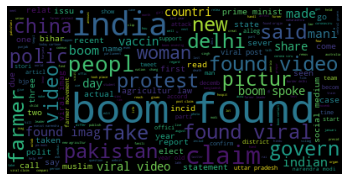

In [100]:
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [101]:
lemme_df=df['lemmetization']

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [104]:
# Bag of Words
vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(lemme_df)

In [105]:
messages_bow = bow_transformer.transform(lemme_df)

In [106]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1518, 3698)


In [107]:
import gensim
from gensim.models import Word2Vec

In [108]:
model = Word2Vec(lemme_df.apply(lambda x: tokenizer.tokenize(x)), min_count=1)

In [109]:
model.wv.most_similar("pakistan")

[('india', 0.9811274409294128),
 ('china', 0.9782524704933167),
 ('govern', 0.9760528206825256),
 ('news', 0.9759079813957214),
 ('said', 0.9757911562919617),
 ('protest', 0.9741312265396118),
 ('corona', 0.9737429618835449),
 ('elect', 0.9725973010063171),
 ('farmer', 0.9724942445755005),
 ('boom', 0.9723902344703674)]

In [110]:
vectorizer = CountVectorizer(max_features=4200)
X = vectorizer.fit_transform(lemme_df).toarray()
y = df['label']

In [115]:

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [116]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)
y_pred_1 = model.predict(X_test)

In [119]:
acc  = accuracy_score(y_test, y_pred_1)
acc

0.9638157894736842

In [120]:
## storing it to perform for bert on google colab

In [121]:
new_df=df[['label','lemmetization']]

In [122]:
new_df

,label,lemmetization
0,1,viral messag round social medium bit fake info...
1,1,boom found viral post articl publish satir websit
2,0,stori written maithili hindi writer rajkam cha...
3,1,boom found viral screenshot fake confirm offic...
4,1,boom found imag januari three polic personnel ...
...,...,...
1513,0,first match four test seri start thursday one ...
1514,1,boom found woman pictur pratibha borkar social...
1515,0,presenc new presid white hous affect relations...
1516,0,work start film industri condit junior artist ...


In [123]:
new_df=new_df.rename(columns={"lemmetization":"short_description"})

In [124]:
new_df.to_csv("final_dataset_bert.csv")## performing on colab giving error to us as of now

In [1]:
## bert code  link

In [ ]:
"https://colab.research.google.com/drive/17Tl1_2fCm69mt4v82bIYQRaKO0ZH1BZd#scrollTo=vHsW0n66YSPt"


## just in case if the colab link doesnt work

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/nlp project bert/final_dataset_bert.csv")
df.head()


In [ ]:
!pip install -U "tensorflow==2.8.*"
!pip install -q -U "tensorflow-text==2.8.*"

In [ ]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub
bert_preprocess=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [ ]:
df=df[['label','short_description']]
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(df['short_description'],df['label'],test_size=0.275)

In [ ]:
def get_sentence_embedings(sentences):
  preprocessed_text=bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name="text")
preprocessed_text=bert_preprocess(text_input)
output=bert_encoder(preprocessed_text)

output['pooled_output']

l=tf.keras.layers.Dropout(0.3,name="dropout")( output['pooled_output'])
l=tf.keras.layers.Dense(1,activation="sigmoid",name="output")(l)

In [ ]:
model=tf.keras.Model(inputs=[text_input],outputs=[l])
model.summary() 
from tensorflow.keras.callbacks import  EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=15)
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=50,callbacks=early_stopping)

In [ ]:
!pip install googletrans==3.1.0a0
!pip install tqdm==4.64.1

In [ ]:
from googletrans import Translator
from tqdm import  tqdm

In [ ]:
texts = [
    "मोदीजी मिले एलियंस से",
    "पाकिस्तान अब संकट में है",
    "इंजीनियरिंग के लिए यूपीईएस कॉलेज अच्छा है.",
    "राहुल मुंबई का एक गरीब लड़का है जो अब एक IAS अधिकारी है",
    "पुतिन ने अपनी रूसी सेना पर हमला किया"
]## here our hindi heading will be there

In [ ]:
translator = Translator()
translated=[]
for i in tqdm(texts):
    translated_text = translator.translate(i ,src='hi',dest='en')
    translated.append(translated_text.text)
df=pd.DataFrame(translated)
translated[0]


In [ ]:
reviews_hindi=model.predict(translated)

In [ ]:
print("the heading is -->",texts[0])
if(float(reviews_hindi[0])>0.52):
  print("the heading is fake")
else:
  print("the heading is not fake")

In [ ]:
print("the heading is -->",texts[1])
if(float(reviews_hindi[1])>0.52):
  print("the heading is fake")
else:
  print("the heading is not fake")

In [ ]:
print("the heading is -->",texts[2])
if(float(reviews_hindi[2])>0.52):
  print("the heading is fake")
else:
  print("the heading is not fake")

In [ ]:
print("the heading is -->",texts[3])
if(float(reviews_hindi[3])>0.51):
  print("the heading is fake")
else:
  print("the heading is not fake")

In [ ]:
print("the heading is -->",texts[4])
if(float(reviews_hindi[4])>0.51):
  print("the heading is fake")
else:
  print("the heading is not fake")